In [3]:
import os
import sys
import subprocess

from qiime2 import Artifact, Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats

%matplotlib inline

In [5]:
data = Artifact.load("tax_table.qza").view(pd.DataFrame)

#convert to relative abundances
data_mat = np.matrix(data)
data_mat /= np.sum(data_mat, axis=1)
data = pd.DataFrame(data_mat, index=data.index, columns=data.columns)

metadata = pd.read_csv("metadata.txt", sep="\t", index_col="SampleID")

In [7]:
metadata.columns

Index(['Race', 'HIV', 'AGE', 'BMI', 'Hip_to_Waist', 'Fibroscan', 'Fibroscan_2',
       'Acetate', 'Propionate', 'Isobutyrate', 'Butyrate', 'Isovalerate',
       'Valerate', 'Isocaptoate', 'Caproate', 'Treatment'],
      dtype='object')

In [9]:
lipids = metadata.loc[:,['HIV',
                         'Acetate', 'Propionate', 'Isobutyrate', 
                         'Butyrate', 'Isovalerate','Valerate', 
                         'Isocaptoate', 'Caproate']]

In [21]:
lipids_z = lipids.drop("HIV", axis=1).apply(stats.zscore)
lipids_z["HIV"] = lipids["HIV"]

In [28]:
grouped_lipids_z = lipids_z.groupby("HIV").mean().reset_index()

In [29]:
grouped_lipids_z

,HIV,Acetate,Propionate,Isobutyrate,Butyrate,Isovalerate,Valerate,Isocaptoate,Caproate
0,No,0.426925,0.168018,-0.068845,0.471310,-0.081283,-0.007250,0.166020,0.211305
1,Yes,-0.406595,-0.160017,0.065567,-0.448867,0.077412,0.006905,-0.158114,-0.201243


In [51]:
melted_lipids_z = pd.melt(grouped_lipids_z, id_vars="HIV")
fig = px.line_polar(melted_lipids_z,
                    r="value",
                    theta="variable",
                    color="HIV",
                    color_discrete_sequence=["royalblue", "red"],
                    line_close=True,
                    title="Z Scores of Short Chain Fatty Acids")
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )))
fig.show()

In [52]:
main_lipids_z_grouped = grouped_lipids_z.loc[:,["Acetate", "Propionate", 
                                                "Butyrate", "Valerate",
                                                "Caproate", "HIV"]]
fig = px.line_polar(pd.melt(main_lipids_z_grouped, id_vars="HIV"),
                    r="value",
                    theta="variable",
                    color="HIV",
                    color_discrete_sequence=["royalblue", "red"],
                    line_close=True,
                    title="Z Scores of Dominant Short Chain Fatty Acids")
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )))
fig.show()

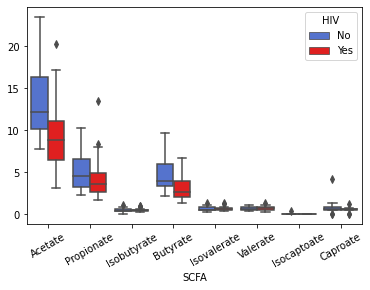

In [55]:
melted_lipids = pd.melt(lipids,
                       id_vars="HIV")
ax = sns.boxplot(x="variable", y="value", hue="HIV", 
                 data=melted_lipids, 
                 hue_order=["No", "Yes"],
                 palette=["royalblue", "red"])
ax.set_xlabel("SCFA")
plt.xticks(rotation=30)
ax.set_ylabel("")
plt.show()

Acetate


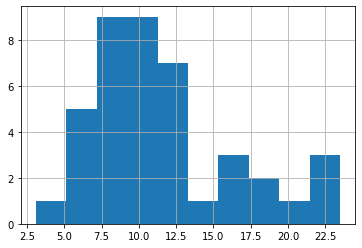

Propionate


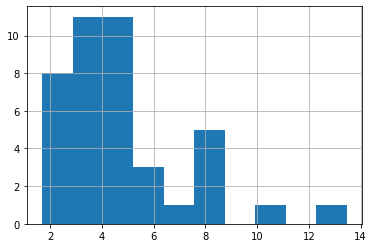

Isobutyrate


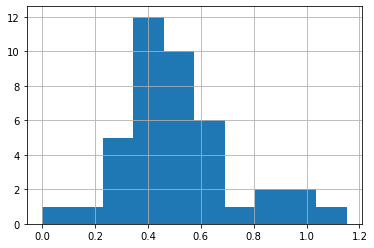

Butyrate


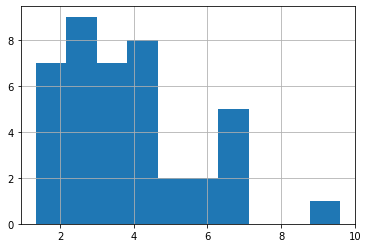

Isovalerate


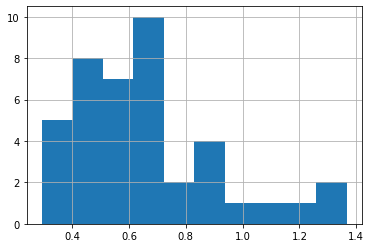

Valerate


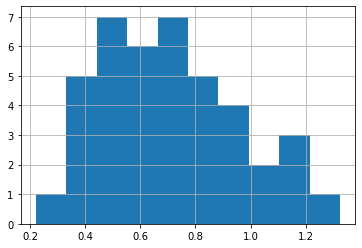

Isocaptoate


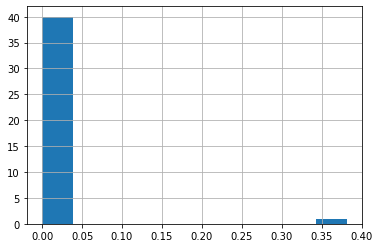

Caproate


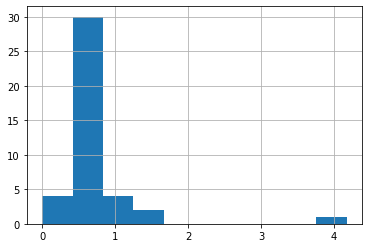

In [64]:
for col in lipids.columns:
    if col!="HIV":
        print(col)
        lipids[col].hist()
        plt.show()

Looks like some are roughly normal, but others aren't. Also n isn't huge, so I'll stick with non-parametric

In [65]:
for col in lipids.columns:
    if col!="HIV":
        print(f"\n {col}")
        res = stats.kruskal(lipids.loc[lipids["HIV"]=="Yes", col],
                            lipids.loc[lipids["HIV"]=="No", col])
        print(res)


 Acetate
KruskalResult(statistic=7.935385113188079, pvalue=0.004847730876468042)

 Propionate
KruskalResult(statistic=2.210396624892676, pvalue=0.13708342292077655)

 Isobutyrate
KruskalResult(statistic=0.24559962498806878, pvalue=0.6201907032969003)

 Butyrate
KruskalResult(statistic=8.232009591012993, pvalue=0.004115793119594308)

 Isovalerate
KruskalResult(statistic=0.786531584231518, pvalue=0.37515096306763773)

 Valerate
KruskalResult(statistic=0.0, pvalue=1.0)

 Isocaptoate
KruskalResult(statistic=1.0500000000000402, pvalue=0.3055070868612417)

 Caproate
KruskalResult(statistic=1.089669320244021, pvalue=0.29654448841576186)
